# <a id="inicio"></a> Exercícios Aprendizado Supervisionado parte 2

-----

### **Autor:** Glauco Lauria Marques Filho

-----

# <a id="resumo"></a> Resumo 

#### Este arquivo contém a resolução dos exercícios da Aula 5 do curso CEDS-808: Aprendizado de Máquina. 

# <a id="sumario"></a> Sumário


* [Início](#inicio)
* [Resumo](#resumo)
* [Sumário](#sumario)
* [Importação de Requisitos](#requisitos)
1. [Dataset Breast Cancer Winconsin](#dataset)
- 1.a.I [SVM](#svm)

# <a id="requisitos"></a> Importação de Requisitos

In [2]:
from ucimlrepo import fetch_ucirepo # Biblioteca que possui os dados da base Breast Cancer Winconsin
from sklearn.svm import SVC
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt


# <a id="dataset"></a> 1. Dataset Breast Cancer Winconsin

Utilizando o dataset Breast Cancer Winconsin para o exercício. Importando o dataset da biblioteca, e carregando dataframes de Features e Target.

In [3]:
# Importando o dataset Breast Cancer Winconsin
breast_c = fetch_ucirepo(id=17) 
# Definindo dataframe de Features e target
X = breast_c.data.features 
y = breast_c.data.targets

Pritando um pouco dos dataframes para uma primeira exploração da base de dados.

In [4]:
X.head()

,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,...,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
y.tail()

,Diagnosis
564,M
565,M
566,M
567,M
568,B


# <a id="svm"></a> 1.a.I SVM

Nesse item iremos aplicar o algoritmo de SVM visto em aula.

Faremos uma modelagem primeiro variando os kernels do SVM

In [6]:
SVM_kernels = ["linear", "poly", "rbf", "sigmoid"]
SVM_mean_accuracy = []
for kernel in SVM_kernels:
    print(f"Kernel = {kernel}")
    svm_classifier = SVC(kernel=kernel)
    acuracias = []
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):
        X_train , X_test = X.iloc[train_index], X.iloc[test_index]
        y_train , y_test = y.iloc[train_index], y.iloc[test_index]
        svm_classifier.fit(X_train,np.ravel(y_train))
        accuracy = svm_classifier.score(X_test, np.ravel(y_test))
        acuracias.append(accuracy)
    acuracia_media = np.mean(acuracias)
    SVM_mean_accuracy.append(acuracia_media)
    print(f"Mean Accuracy at 5 folds = {acuracia_media}\n")

Kernel = linear


Mean Accuracy at 5 folds = 0.9525384257102933

Kernel = poly
Mean Accuracy at 5 folds = 0.9069243906225741

Kernel = rbf
Mean Accuracy at 5 folds = 0.9069243906225741

Kernel = sigmoid
Mean Accuracy at 5 folds = 0.43758733115975784



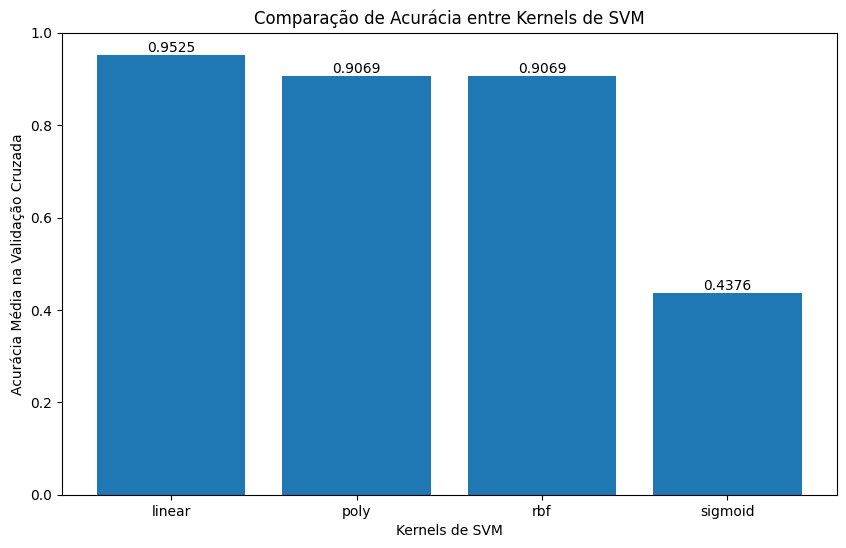

In [7]:
plt.figure(figsize=(10, 6))
bars =plt.bar(SVM_kernels, SVM_mean_accuracy)
plt.xlabel('Kernels de SVM')
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia entre Kernels de SVM')
plt.ylim(0, 1)
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')
plt.show()

Tivemos uma media de acuracia maior utilizando o Kernel Linear, chegando a 95% de acuracia.

Agora faremos uma variacao dos Kernels e tambem os Gammas e Cs.

In [8]:
# SVM_kernels = ["linear", "poly", "rbf", "sigmoid"]
SVM_kernels = ["linear"]
gammas = [0.1,1,10]
C_values = [0.1,1,10]
SVM_Linear_mean_accuracy = []
SVM_Linear_models = []
for kernel in SVM_kernels:
    for gamma in gammas:
        for C in C_values:
            model = f"Kernel:{kernel}, Gamma:{gamma}, C:{C}"
            SVM_Linear_models.append(model)
            print(model)
            svm_classifier = SVC(kernel=kernel, gamma=gamma, C=C)
            acuracias = []
            kf = KFold(n_splits=5)
            for train_index, test_index in kf.split(X):
                X_train , X_test = X.iloc[train_index], X.iloc[test_index]
                y_train , y_test = y.iloc[train_index], y.iloc[test_index]
                svm_classifier.fit(X_train,np.ravel(y_train))
                accuracy = svm_classifier.score(X_test, np.ravel(y_test))
                acuracias.append(accuracy)
            acuracia_media = np.mean(acuracias)
            SVM_Linear_mean_accuracy.append(acuracia_media)
            print(f"Mean Accuracy at 5 folds = {acuracia_media}\n")

Kernel:linear, Gamma:0.1, C:0.1
Mean Accuracy at 5 folds = 0.9455053563111318

Kernel:linear, Gamma:0.1, C:1
Mean Accuracy at 5 folds = 0.9525384257102933

Kernel:linear, Gamma:0.1, C:10
Mean Accuracy at 5 folds = 0.9455208818506444

Kernel:linear, Gamma:1, C:0.1
Mean Accuracy at 5 folds = 0.9455053563111318

Kernel:linear, Gamma:1, C:1
Mean Accuracy at 5 folds = 0.9525384257102933

Kernel:linear, Gamma:1, C:10
Mean Accuracy at 5 folds = 0.9455208818506444

Kernel:linear, Gamma:10, C:0.1
Mean Accuracy at 5 folds = 0.9455053563111318

Kernel:linear, Gamma:10, C:1
Mean Accuracy at 5 folds = 0.9525384257102933

Kernel:linear, Gamma:10, C:10
Mean Accuracy at 5 folds = 0.9455208818506444



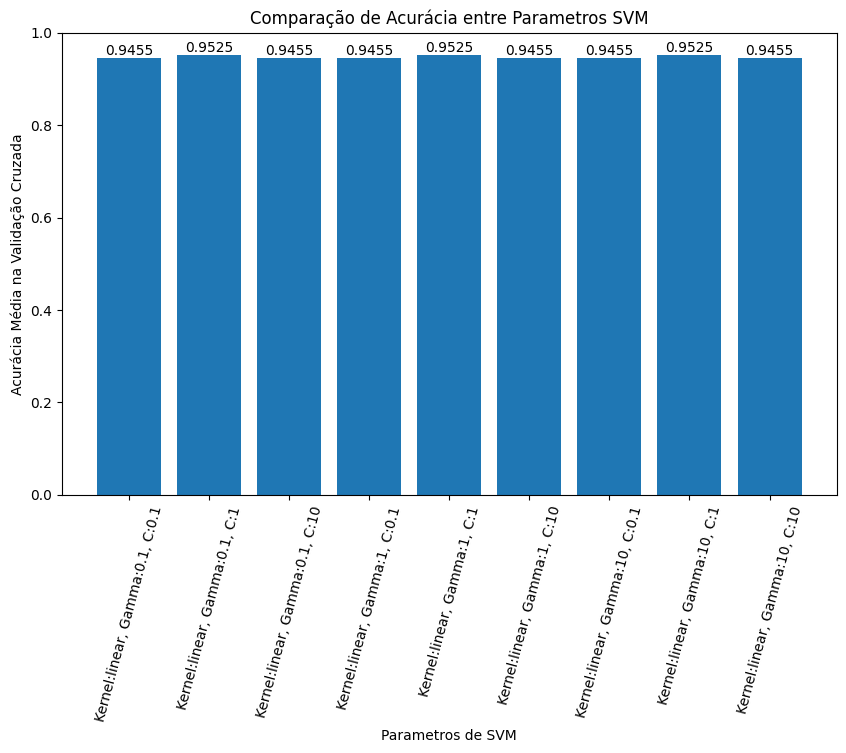

In [9]:
plt.figure(figsize=(10, 6))
bars =plt.bar(SVM_Linear_models, SVM_Linear_mean_accuracy)
plt.xlabel('Parametros de SVM')
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia entre Parametros SVM')
plt.ylim(0, 1)
plt.xticks(rotation=75)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')
plt.show()

In [12]:
# SVM_kernels = ["linear", "poly", "rbf", "sigmoid"]
SVM_kernels = ["rbf"]
gammas = [0.1,1,10]
C_values = [0.1,1,10]
SVM_Rbf_mean_accuracy = []
SVM_Rbf_models = []
for kernel in SVM_kernels:
    for gamma in gammas:
        for C in C_values:
            model = f"Kernel:{kernel}, Gamma:{gamma}, C:{C}"
            SVM_Rbf_models.append(model)
            print(model)
            svm_classifier = SVC(kernel=kernel, gamma=gamma, C=C)
            acuracias = []
            kf = KFold(n_splits=5)
            for train_index, test_index in kf.split(X):
                X_train , X_test = X.iloc[train_index], X.iloc[test_index]
                y_train , y_test = y.iloc[train_index], y.iloc[test_index]
                svm_classifier.fit(X_train,np.ravel(y_train))
                accuracy = svm_classifier.score(X_test, np.ravel(y_test))
                acuracias.append(accuracy)
            acuracia_media = np.mean(acuracias)
            SVM_Rbf_mean_accuracy.append(acuracia_media)
            print(f"Mean Accuracy at 5 folds = {acuracia_media}\n")

Kernel:rbf, Gamma:0.1, C:0.1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:rbf, Gamma:0.1, C:1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:rbf, Gamma:0.1, C:10
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:rbf, Gamma:1, C:0.1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:rbf, Gamma:1, C:1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:rbf, Gamma:1, C:10
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:rbf, Gamma:10, C:0.1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:rbf, Gamma:10, C:1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:rbf, Gamma:10, C:10
Mean Accuracy at 5 folds = 0.6276665114112715



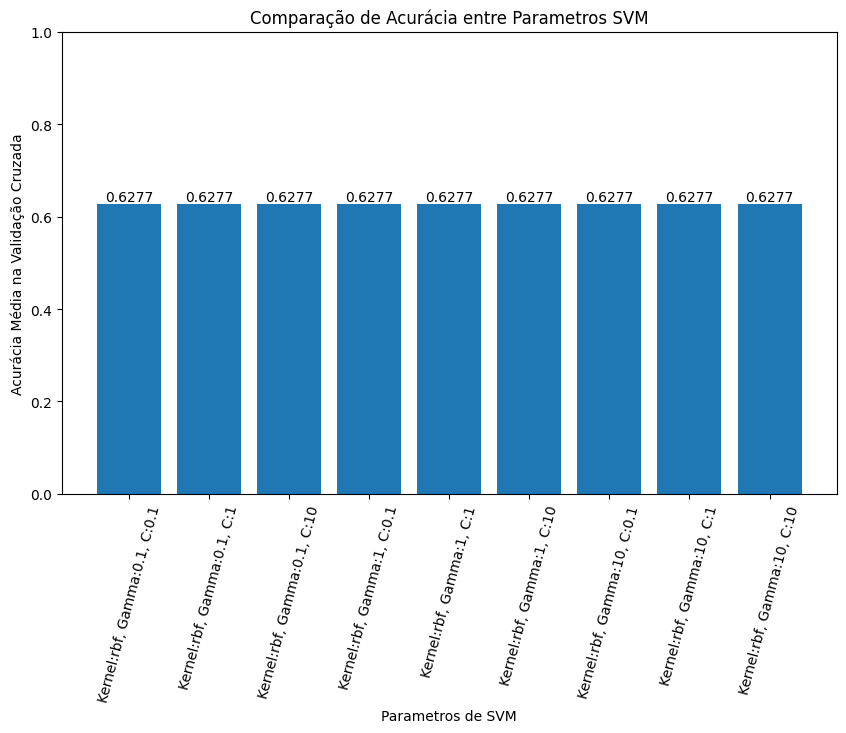

In [13]:
plt.figure(figsize=(10, 6))
bars =plt.bar(SVM_Rbf_models, SVM_Rbf_mean_accuracy)
plt.xlabel('Parametros de SVM')
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia entre Parametros SVM')
plt.ylim(0, 1)
plt.xticks(rotation=75)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')
plt.show()

In [14]:
# SVM_kernels = ["linear", "poly", "rbf", "sigmoid"]
SVM_kernels = ["sigmoid"]
gammas = [0.1,1,10]
C_values = [0.1,1,10]
SVM_Sigmoid_mean_accuracy = []
SVM_Sigmoid_models = []
for kernel in SVM_kernels:
    for gamma in gammas:
        for C in C_values:
            model = f"Kernel:{kernel}, Gamma:{gamma}, C:{C}"
            SVM_Sigmoid_models.append(model)
            print(model)
            svm_classifier = SVC(kernel=kernel, gamma=gamma, C=C)
            acuracias = []
            kf = KFold(n_splits=5)
            for train_index, test_index in kf.split(X):
                X_train , X_test = X.iloc[train_index], X.iloc[test_index]
                y_train , y_test = y.iloc[train_index], y.iloc[test_index]
                svm_classifier.fit(X_train,np.ravel(y_train))
                accuracy = svm_classifier.score(X_test, np.ravel(y_test))
                acuracias.append(accuracy)
            acuracia_media = np.mean(acuracias)
            SVM_Sigmoid_mean_accuracy.append(acuracia_media)
            print(f"Mean Accuracy at 5 folds = {acuracia_media}\n")

Kernel:sigmoid, Gamma:0.1, C:0.1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:sigmoid, Gamma:0.1, C:1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:sigmoid, Gamma:0.1, C:10
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:sigmoid, Gamma:1, C:0.1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:sigmoid, Gamma:1, C:1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:sigmoid, Gamma:1, C:10
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:sigmoid, Gamma:10, C:0.1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:sigmoid, Gamma:10, C:1
Mean Accuracy at 5 folds = 0.6276665114112715

Kernel:sigmoid, Gamma:10, C:10
Mean Accuracy at 5 folds = 0.6276665114112715



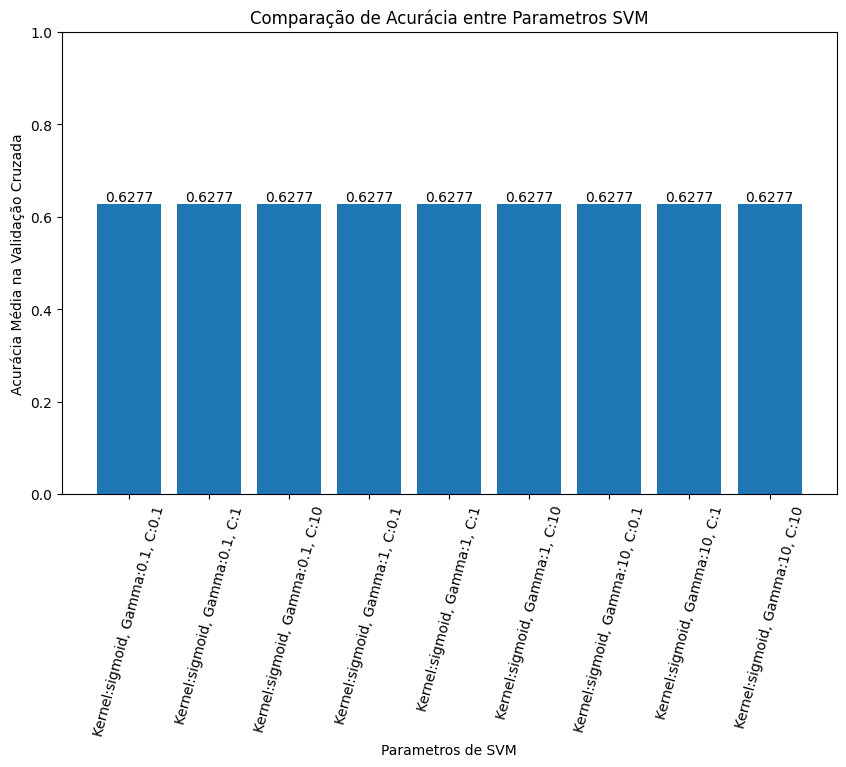

In [15]:
plt.figure(figsize=(10, 6))
bars =plt.bar(SVM_Sigmoid_models, SVM_Sigmoid_mean_accuracy)
plt.xlabel('Parametros de SVM')
plt.ylabel('Acurácia Média na Validação Cruzada')
plt.title('Comparação de Acurácia entre Parametros SVM')
plt.ylim(0, 1)
plt.xticks(rotation=75)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 4), va='bottom', ha='center')
plt.show()

Para o modelo linear os parametros Gamma e C nao afetaram tanto a acuracia final. Para o sigmoid e Rbf nao influenciaram em nada. Porem para o Kernel Poly o hardware do aluno nao estava conseguindo processar com parametros gamma e C, na primeira simulacao o codigo ficou mais de 5 horas calculando e nao havia terminado ainda. Entao a analise do polinomio variando gamma e C ficara sem o teste polinomial para essa base de dados.